# CÂU HỎI 4: 
**Thành phố thuộc quốc gia nào có sự thay đổi nhiều nhất (tăng ô nhiễm nhiều nhất, giảm ô nhiễm nhiều nhất)? Giai đoạn nào là nhiều nhất? Tại sao?**

In [1]:
# Gọi các thư viện cần thiết.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# remove warnings
import warnings
warnings.simplefilter('ignore') 

### Đọc dữ liệu từ file

In [2]:
df = pd.read_csv("airdata6years.csv")
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,NaN,NaN,NaN,NaN


### Lấy dữ liệu 5 năm của tất cả các thành phố quốc gia từ 2017 - 2021

In [3]:
five_years = df[['Rank','City',	'Country',	'Year_2021', 'Year_2020', 'Year_2019', 'Year_2018', 'Year_2017']]
five_years

,Rank,City,Country,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6470,6296,Alandroal,Portugal,4.9,4.8,5.3,7.1,13.3
6471,6297,Björklinge,Sweden,4.9,NaN,NaN,NaN,NaN
6472,6298,Bothwell,United Kingdom,4.9,NaN,NaN,NaN,NaN
6473,6299,Currie,United Kingdom,4.9,NaN,NaN,NaN,NaN


### So sánh năm trong 5 năm, thành phố, quốc gia nào có biến động lớn nhất

#### Tính max, min từng dòng lưu vào max_df, min_df

In [4]:
max_df = five_years.drop(['Rank'], axis = 1).max(axis = 1)
min_df = five_years.drop(['Rank'], axis = 1).min(axis = 1)

#### Đánh giá mức độ ô nhiễm
| Tiêu chí | Trong khoảng |
| --- | --- |
| Đáp ứng hướng dẫn WHO | [0,5] |
| Vượt từ 1 đến 2 lần | (5,10] |
| Vượt từ 2 đến 3 lần |(10,15] |
| Vượt từ 3 đến 5 lần | (15, 25] |
| Vượt từ 5 đến 7 lần | (25, 35] |
| Vượt từ 7 đến 10 lần | (35,50] | 
| Vượt hơn 10 lần | >50 | 

- Ta sẽ xét các TH có max - min > 30

In [5]:
air_volatility_df = five_years[max_df - min_df >= 25]
air_volatility_df

,Rank,City,Country,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,106.6,110.2,135.2,144.6
3,4,Delhi,India,96.4,84.1,98.6,113.5,108.2
5,6,Faisalabad,Pakistan,94.2,73.2,104.6,130.4,NaN
6,7,Noida,India,91.4,94.3,97.7,123.6,134.0
...,...,...,...,...,...,...,...,...
972,789,Zhangjiakou,China,23.2,24.3,26.1,36.3,56.7
1034,1079,Pekanbaru,Indonesia,20.1,24.2,52.8,NaN,NaN
1426,1458,Hartbeespoort,South Africa,17.0,20.8,60.0,NaN,NaN
2029,1630,Nagqu,China,15.7,15.6,18.4,32.9,43.0


- Tuy nhiên có thể có những nơi biến đổi từ 50 đến 100, mức độ đánh giá là giống nhau. 
- Để thấy những nước nào có sự thay đổi trong mức độ đánh giá ta lấy min < 25  và max > 50

In [6]:
new_max_df = air_volatility_df.drop(['Rank'], axis = 1).max(axis = 1)
new_min_df = air_volatility_df.drop(['Rank'], axis = 1).min(axis = 1)
low2high_df = air_volatility_df[new_min_df < 25][new_max_df > 50]
low2high_df

,Rank,City,Country,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
328,84,Lampang,Thailand,52.2,31.6,33.1,23.3,19.5
972,789,Zhangjiakou,China,23.2,24.3,26.1,36.3,56.7
1034,1079,Pekanbaru,Indonesia,20.1,24.2,52.8,NaN,NaN
1426,1458,Hartbeespoort,South Africa,17.0,20.8,60.0,NaN,NaN


Dùng biểu đồ heatmap để biểu diễn giúp ta có thể thấy rõ hơn về mức độ ô nhiễm tổng thể của 4 địa điểm thuộc 5 quốc gia có sự biến động về chất lượng không khí.

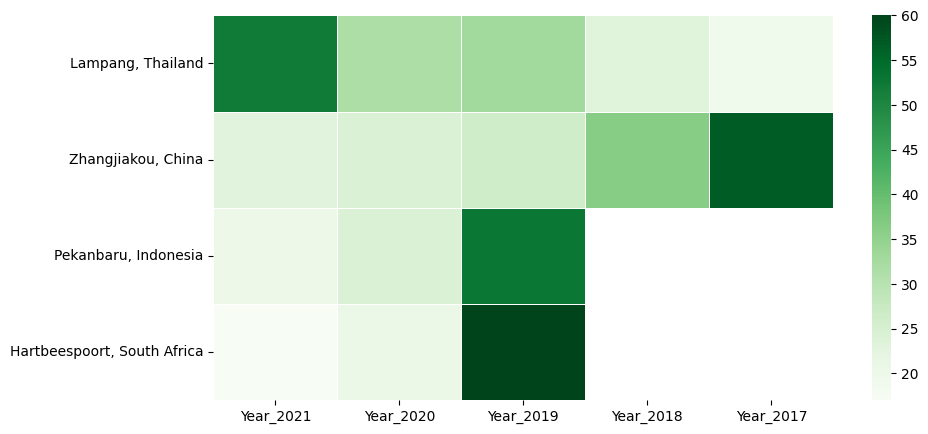

In [7]:
low2high_df.sort_values(by='Rank')
del_col = ['Rank', 'City', 'Country']
Index_df = low2high_df['City'] + ', ' + low2high_df['Country']
visualize_df = low2high_df.set_index(Index_df)
fig, ax = plt.subplots(1, figsize = (10,5))
sns.heatmap(visualize_df.drop(del_col, axis = 1), linewidths = 0.5, cmap = "Greens")
plt.show()

- Biểu đồ thể hiện được sự thay đổi chất lượng không khí của các thành phố có sự biến đổi nhiều nhất.
- Ở Lampang có sự tăng dần theo từng năm.
- (Zhangjiakou, China), (Pekanbaru, Indonesia), (Hartbeespoort, South Africa) giảm theo từng năm.

Tiếp theo, ta sẽ tính các quốc gia có sự thay đổi nhiều nhất.

In [8]:
air_volatility_df.sort_values(by = 'Rank')

,Rank,City,Country,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,106.6,110.2,135.2,144.6
3,4,Delhi,India,96.4,84.1,98.6,113.5,108.2
5,6,Faisalabad,Pakistan,94.2,73.2,104.6,130.4,NaN
6,7,Noida,India,91.4,94.3,97.7,123.6,134.0
...,...,...,...,...,...,...,...,...
713,814,Pontianak,Indonesia,22.9,18.8,49.7,NaN,NaN
1034,1079,Pekanbaru,Indonesia,20.1,24.2,52.8,NaN,NaN
1426,1458,Hartbeespoort,South Africa,17.0,20.8,60.0,NaN,NaN
2029,1630,Nagqu,China,15.7,15.6,18.4,32.9,43.0


Tương tự, heatmap giúp ta xem rõ hơn về tình hình biến động chất lượng không khí nhiều nhất của các địa điểm.

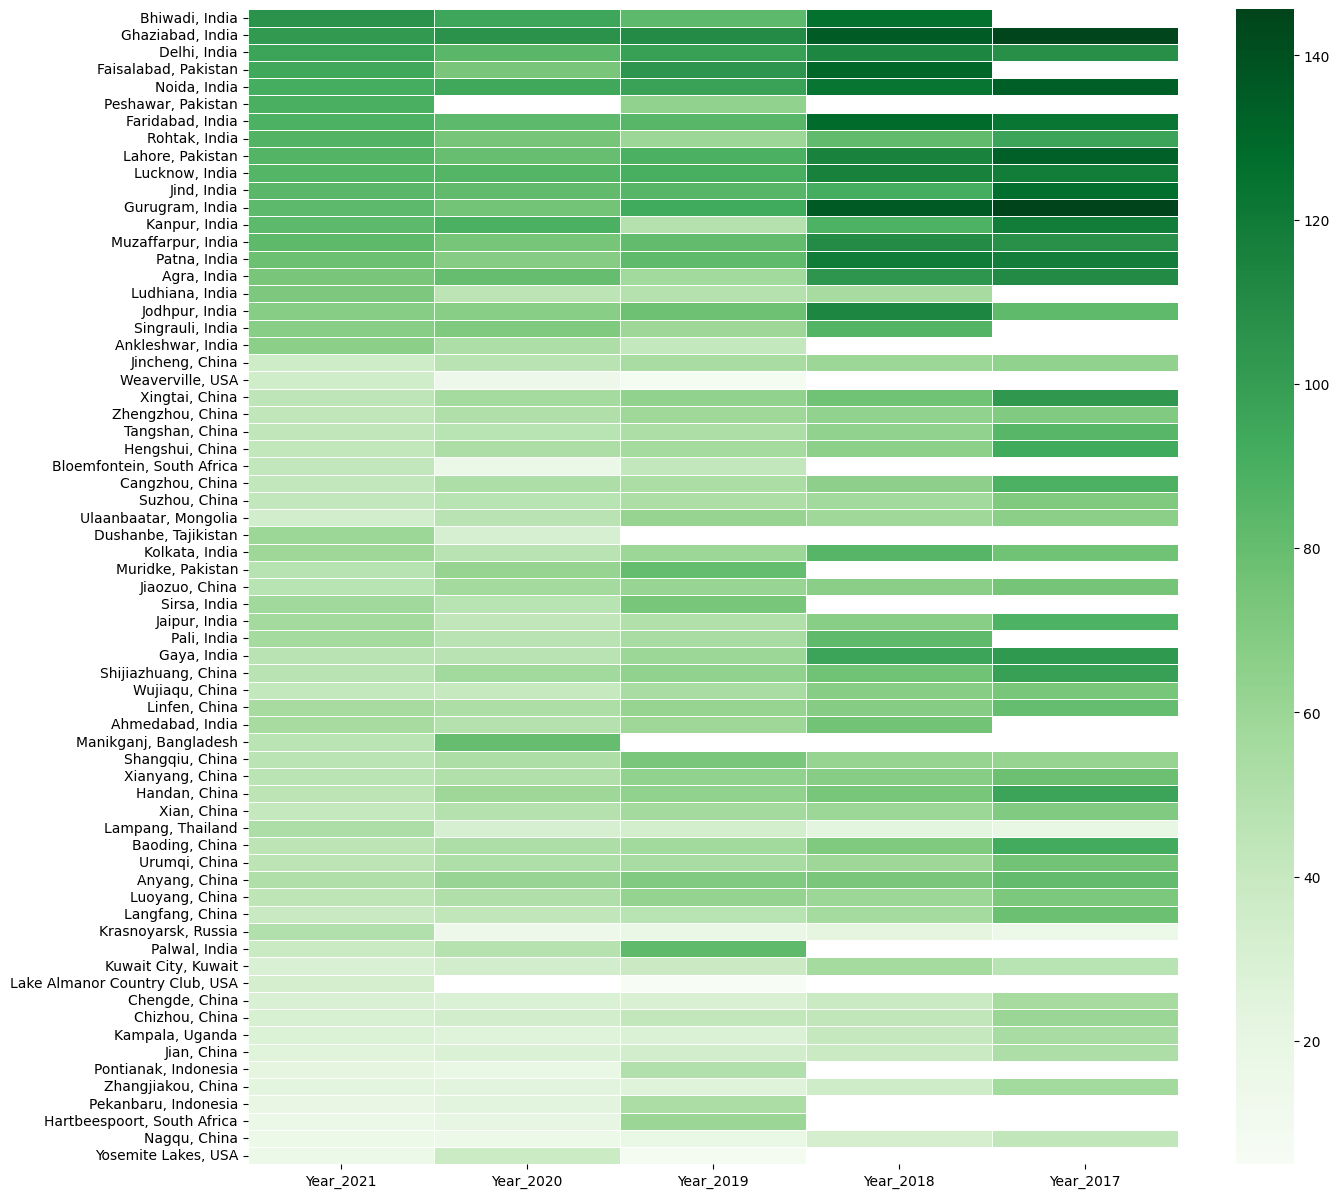

In [9]:
del_col = ['Rank', 'City', 'Country']
Index_df = air_volatility_df['City'] + ', ' + air_volatility_df['Country']
visualize_air_volatility = air_volatility_df.set_index(Index_df)
fig, ax = plt.subplots(1, figsize = (15,15))
sns.heatmap(visualize_air_volatility.drop(del_col, axis = 1), linewidths = 0.5, cmap = "Greens")
plt.show()

Để so sánh các quốc gia có số lần biến động nhiều nhất từ năm 2017 đến 2021 ta sẽ dùng biểu đồ cột thay vì dùng biểu đồ đường (thể hiện sự thay đổi của 1 quốc gia) và biểu đồ đường tròn (thể hiện phần trăm, vẫn dùng được tuy nhiên không phù hợp).

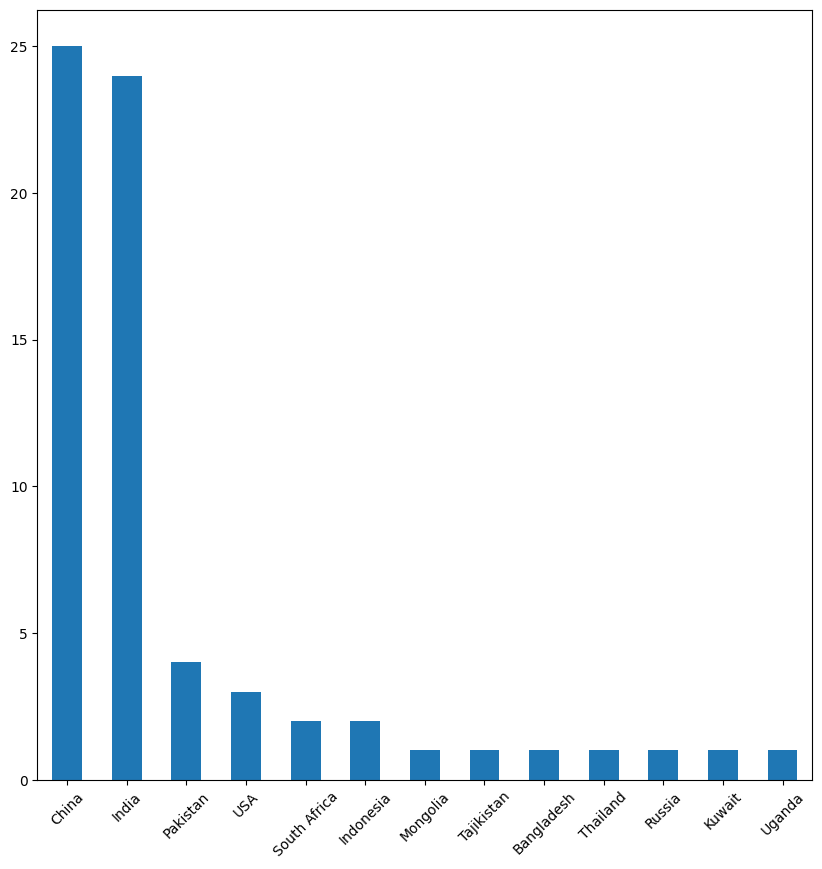

In [10]:
fig, ax = plt.subplots(1, figsize = (10, 10))
air_volatility_df['Country'].value_counts().plot.bar()
plt.xticks(rotation = 45)
plt.show()

Lấy 3 quốc gia có thành phố biến đổi nhiều nhất.

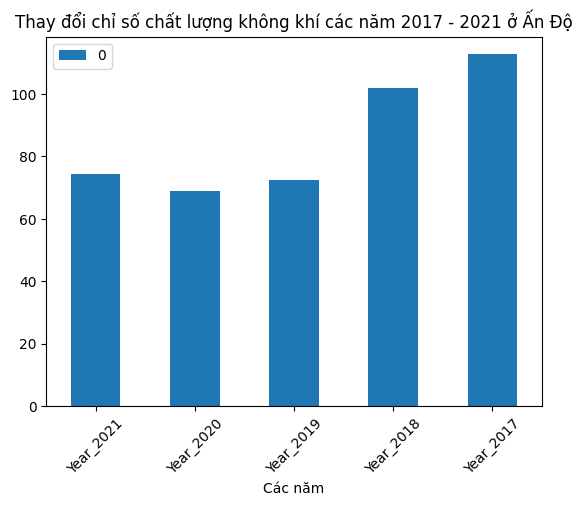

In [11]:
air_country_df = air_volatility_df.drop(['City'], axis = 1)
air_country_df = air_country_df.drop(['Rank'], axis = 1)
India = pd.DataFrame(air_country_df[air_country_df['Country']== 'India'].mean())
India.plot.bar(rot = 45)
plt.xlabel('Các năm')
plt.title('Thay đổi chỉ số chất lượng không khí các năm 2017 - 2021 ở Ấn Độ')
plt.show()

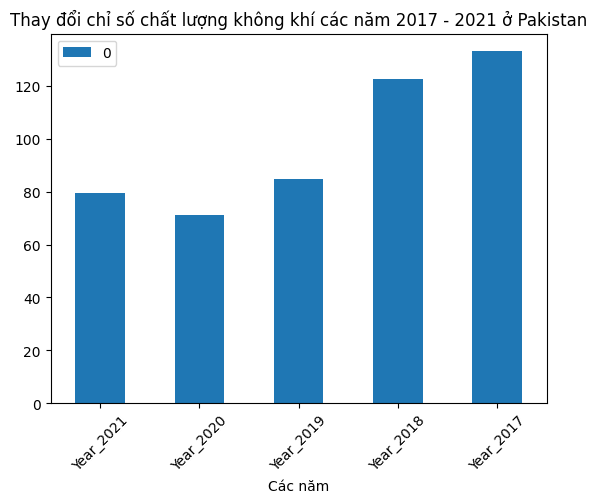

In [12]:
air_country_df = air_volatility_df.drop(['City'], axis = 1)
air_country_df = air_country_df.drop(['Rank'], axis = 1)
India = pd.DataFrame(air_country_df[air_country_df['Country']=='Pakistan'].mean())
India.plot.bar(rot = 45)
plt.xlabel('Các năm')
plt.title('Thay đổi chỉ số chất lượng không khí các năm 2017 - 2021 ở Pakistan')
plt.show()

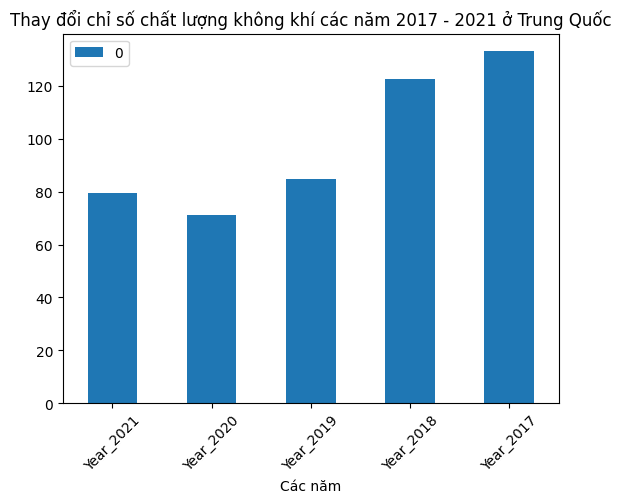

In [13]:
air_country_df = air_volatility_df.drop(['City'], axis = 1)
air_country_df = air_country_df.drop(['Rank'], axis = 1)
India = pd.DataFrame(air_country_df[air_country_df['Country'] == 'Pakistan'].mean())
India.plot.bar(rot = 45)
plt.xlabel('Các năm')
plt.title('Thay đổi chỉ số chất lượng không khí các năm 2017 - 2021 ở Trung Quốc')
plt.show()

**Nhận xét**
- Có thể thấy hầu hết giảm mạnh từ năm 2018 - năm 2019. Đây là năm giãn cách do dịch, sau đó có xu hướng giảm nhẹ lại vào năm 2020.
- Sau giãn cách, chất lượng ô nhiễm không khí có xu hướng tăng.

**LỢI ÍCH CỦA VIỆC TRẢ LỜI CÂU HỎI**
- Việc trả lời câu hỏi này giúp ta có thể biết được nguyên nhân của ô nhiễm không khí, đa phần sẽ do con người gây ra. Không khí bị ảnh hưởng ít nhiều bởi chính hoạt động của con người, ở Trung Quốc thường là khói bụi từ nhà máy, xe cộ.
- Do đó, ta có thể xem xét việc thay đổi sinh hoạt hoặc giảm khí thải từ các hoạt động sinh hoạt, điều này giúp cho Trái Đất trong lành hơn.